# Perceptron and XOR

##  Introduction

To first approximation, activity of a neuron in the brain is determined by the integration of excitatory and inhibitory impulses received by its dendrites and passed to the cell body. If excitatory signals outweigh inhibitory signals sufficiently to pass a threshold, the neuron will fire, sending out an action potential via its axon.  
  

Artificial neurons were conceived to behave in a similar manner to real ones. Early artifical neurons were dubbed perceptrons; they received multiple binary inputs, multiplied each one by an appropriate “weight”, added them together (this should sound familiar), and produced a single binary output that depends on whether the sum passes a certain threshold.  In short, they applied a step function to the transformed input.  This is referred to as an LBF (linear basis function) activation function.  
  
![LBF](https://younesstrittmatter.github.io/502B/_static/images/lbf_perceptron.html)
  
If we define the threshold $ \equiv-b $, then we can rewrite our conditional output  
  
\begin{equation}
 output=
\begin{cases}
 0 & if \: w \cdot x + b \leq 0
\\
1  & if \: w \cdot x + b >  0
\end{cases}
\end{equation}  
  
The term $b$ is called a bias, and perceptrons are a special kind of linear classifier called a binary classifier. It is known as a binary classifier because it is assigning one of two labels (the binary output) to the inputs it receives, according to their dot product with the weights (a linear operation). The line defined by $ w \cdot x+b=0 $ is the line that separates the classes from each other. Our “red square, blue circle” class example from earlier in the lab is an example of binarily classifiable data.  
  
![multilayer ffn](https://younesstrittmatter.github.io/502B/_static/images/multilayer_ffn.html)  
  
In a multilayer feedforward network, artificial neurons are clustered into layers, where the output of one layer forms the input of the next. The first layer is known as the input layer, the last is the output layer, and the operational layers, where the dot products are computed, are called “hidden layers”.

Binary classification is simple but powerful. We will show this by using them to construct a set of logic gates.

## Code Examples

### Installation and Setup



In [ ]:
!pip install psyneulink

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### AND

An AND gate is a logic gate that answers the question, “are A and B both simultaneously true?”. The value 1 corresponds to True, and the value 0 corresponds to False.

First, let's define a training set that includes all possible input combinations of the  boolean values True (`1`) and False (`0`) and their corresponding labels. Remember, AND(X, Y) is true if and only if both X and Y are true.

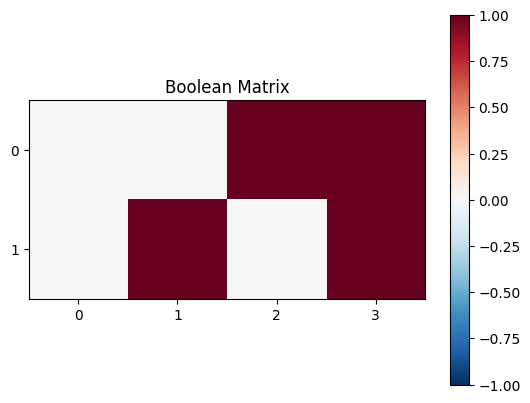

In [6]:
# Create the input set
input_set = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
input_set = input_set.T
n_combos = np.shape(input_set)[1]
ub = np.max(abs(input_set))
lb = - ub

# Create the labels
and_labels = np.array([0, 0, 0, 1])
and_labels.shape = (1, n_combos)

plt.figure()
plt.title('Boolean Matrix')
plt.xticks(np.arange(0, n_combos))
plt.yticks(np.arange(0, 2))
plt.imshow(input_set, cmap='RdBu_r', vmin=lb, vmax=ub)
plt.colorbar()
plt.show()


#### Learning the Weights

For a simple gate like this, we could choose our weights and bias manually to correctly classify each example. However, we would rather the perceptron learn the weights itself. We can train it using supervised learning by showing it examples of the data with the appropriate labels (a truth table). If the weights were initialized randomly, these will generate a random answer at first, so the perceptron must change its weights when its output does not match the labels we gave it. 
  
For perceptrons, we use error-based learning, where the weights are adjusted in the correct direction, based on the size and direction of the error. This is given by the Perceptron Learning Rule, and is written mathematically as:  

$$
\begin{equation}
w_{ij} \rightarrow w_{ij}+ \eta (desired \ label - predicted \ label) in_{i}
\end{equation}
$$

Where $w_{ij}$ is the weight connecting the $i-th$ input to the $j-th$ output, $in_{i}$ is the $i{th}$ input, and $ \eta $ is the learning rate. The learning rate is a positive parameter that determines the size of the weight update.

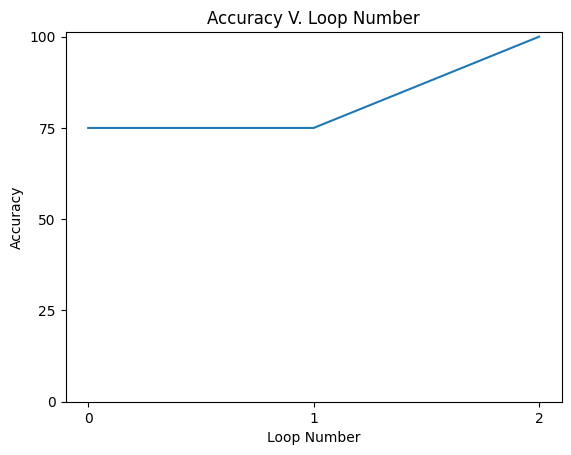

In [31]:
# Set a random seed for reproducibility
np.random.seed(42)

# Initializing the weights with random values.
w = np.random.rand(1, 2) * .1

# Set the bia and learning rate
b = -1
eta = np.array([.3, .3])

# Variables to store the accuracy and loop count
accuracy = 0
loop_count = 0
acc_vec = []

while accuracy < 100:
    summed_accuracy = 0
    # Calculate the predicted value for each input and learn the weights 
    for i in range(np.shape(input_set)[1]):
        # Set the predicted label to 0 if the predicted value is less than or equal to 0 
        # and 1 otherwise
        if w @ input_set[:, i] + b <= 0:
            predicted_label = 0
        else:
            predicted_label = 1
        # Check if the predicted label is correct
        if predicted_label == and_labels[:, i]:
            # Summing the accuracy
            summed_accuracy = summed_accuracy + 100
        else:
            diff = (and_labels[:, i] - predicted_label)
            # Update the weights if the predicted label is incorrect
            w = w + eta * diff * input_set[:, i].T
    accuracy = int(summed_accuracy / n_combos)
    acc_vec = np.append(acc_vec, accuracy)
    loop_count = loop_count + 1
lc = loop_count

# Plot the accuracy over time
plt.figure()
plt.plot(acc_vec)
plt.title('Accuracy V. Loop Number')
plt.xlabel('Loop Number')
plt.ylabel('Accuracy')
plt.xticks(np.arange(0, int(lc)))
plt.yticks([0, 25, 50, 75, 100])
plt.show()

### Exercise 1

Implement the OR gate using the perceptron learning rule. The OR gate is a logic gate that answers the question, “is A or B true?”. Remember, OR(X, Y) is true if either X or Y (or both) are true.

In [ ]:
# Implement your code here

<details><summary><b>Solution</b></summary>

```python
# We can use the same input_set but use different labels
or_labels = np.array([0, 1, 1, 1])
or_labels.shape = (1, n_combos)

# Set a random seed for reproducibility
np.random.seed(42)

# Initializing the weights with random values.
w = np.random.rand(1, 2) * .1


# Set the bia and learning rate
b = -1
eta = np.array([.3, .3])

# Variables to store the accuracy and loop count
accuracy = 0
loop_count = 0
acc_vec = []

while accuracy < 100:
    summed_accuracy = 0
    # Calculate the predicted value for each input and learn the weights 
    for i in range(np.shape(input_set)[1]):
        # Set the predicted label to 0 if the predicted value is less than or equal to 0 
        # and 1 otherwise
        if w @ input_set[:, i] + b <= 0:
            predicted_label = 0
        else:
            predicted_label = 1
        # Check if the predicted label is correct
        if predicted_label == or_labels[:, i]:
            # Summing the accuracy
            summed_accuracy = summed_accuracy + 100
        else:
            diff = (or_labels[:, i] - predicted_label)
            # Update the weights if the predicted label is incorrect
            w = w + eta * diff * input_set[:, i].T
    accuracy = int(summed_accuracy / n_combos)
    acc_vec = np.append(acc_vec, accuracy)
    loop_count = loop_count + 1
lc = loop_count

# Plot the accuracy over time
plt.figure()
plt.plot(acc_vec)
plt.title('Accuracy V. Loop Number')
plt.xlabel('Loop Number')
plt.ylabel('Accuracy')
plt.xticks(np.arange(0, int(lc)))
plt.yticks([0, 25, 50, 75, 100])
plt.show()
```

</details>
